In [1]:
import tensorflow as tf
from util import *
from load_data import load_input_file, build_combined_input
from NN_train import *
path_tosave = 'sstt'

In [2]:
samples, feature_names = load_input_file('data/sstt_w.h5')
input_features, targets, weights = build_combined_input(samples)

Found 9 features on the dataset 9 features were loaded: 

nJets_OR
jet_pseudoscore_DL1r0
jet_pseudoscore_DL1r1
jet_pseudoscore_DL1r2
Mll01
sumPsbtag
HT_jets
met_met
HT_lep
 
Dataset contains 270849 Signal events and 983568 Background events.


In [3]:
ScaleWeights(targets,weights)
#scale the input between 0-1
scaler = StandardScaler().fit(input_features)
input_scaled = scaler.transform(input_features)


======Weight Statistic========================================
Weights::        W(1)=1229.8, W(0)=1850.77
Scaled weights:: W(1)=627209, W(0)=627208


In [4]:
train, val, test = Train_Val_Test_Split(input_scaled, targets, weights)

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
#num_folds = 2
n_epochs = 100
batch_size = 2000
input_shape = train[0].shape[1]
model = Create_Model_basic(input_shape)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense (Dense)                (None, 36)                360       
_________________________________________________________________
dropout (Dropout)            (None, 36)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 48)                1776      
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 49        
Total params: 2,185
Trainable params: 2,185
Non-trainable params: 0
_________________________________________________________________


In [7]:
fitfull_history = Train_NN(model, train, val, n_epochs, batch_size)

Train on 903180 samples, validate on 125442 samples
INFO LR Schedule: 0.01
Epoch 1/100
903180/903180 [==============================] - 1s 1us/sample - loss: 0.3221 - accuracy: 0.8835 - val_loss: 0.2435 - val_accuracy: 0.9029
INFO LR Schedule: 0.01
Epoch 2/100
136000/903180 [===>..........................] - ETA: 0s - loss: 0.2982 - accuracy: 0.8944

/home/avdgraaf/.local/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


903180/903180 [==============================] - 1s 1us/sample - loss: 0.2946 - accuracy: 0.8963 - val_loss: 0.2327 - val_accuracy: 0.9084
INFO LR Schedule: 0.009
Epoch 3/100
903180/903180 [==============================] - 1s 1us/sample - loss: 0.2887 - accuracy: 0.8979 - val_loss: 0.2472 - val_accuracy: 0.9008
INFO LR Schedule: 0.009
Epoch 4/100
903180/903180 [==============================] - 1s 1us/sample - loss: 0.2860 - accuracy: 0.8985 - val_loss: 0.2313 - val_accuracy: 0.9083
INFO LR Schedule: 0.009
Epoch 5/100
903180/903180 [==============================] - 1s 1us/sample - loss: 0.2845 - accuracy: 0.8988 - val_loss: 0.2381 - val_accuracy: 0.9058
INFO LR Schedule: 0.0081
Epoch 6/100
903180/903180 [==============================] - 1s 1us/sample - loss: 0.2830 - accuracy: 0.8998 - val_loss: 0.2235 - val_accuracy: 0.9102
INFO LR Schedule: 0.0081
Epoch 7/100
903180/903180 [==============================] - 1s 1us/sample - loss: 0.2821 - accuracy: 0.8994 - val_loss: 0.2464 - val_a

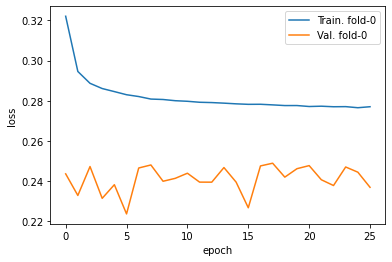

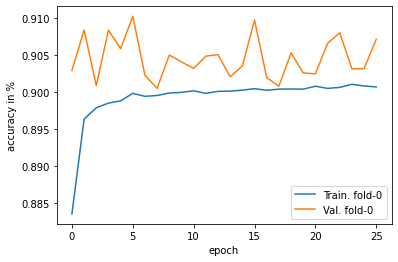

In [8]:
Plot_Metrics(fitfull_history, path_tosave)

In [9]:
nn_scores_test = model.predict(test[0], verbose = True)
nn_scores = model.predict(train[0], verbose = True)

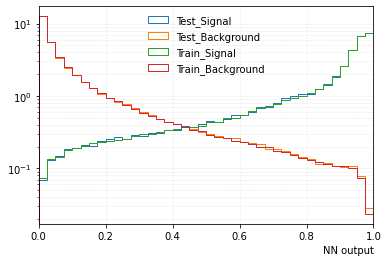

In [10]:
fig = plt.figure()
plt.grid(color='k', which='both', linestyle='--', lw=0.5, alpha=0.1, zorder = 0)
plt.xlabel("NN output", horizontalalignment='right', x=1)
plt.xlim([0,1])
plt.yscale('log')
histargs = {"bins":40, "range":(0,1.), "density":True, "histtype":'step'}
plt.hist(nn_scores_test[test[1]==1],label = "Test_Signal", **histargs)
plt.hist(nn_scores_test[test[1]==0],label = "Test_Background", **histargs)
plt.hist(nn_scores[train[1]==1],label = "Train_Signal", **histargs)
plt.hist(nn_scores[train[1]==0],label = "Train_Background", **histargs)
plt.legend(loc='upper center', frameon=False,)

# TO DOs:


### - Save Model / Load Model
### - K-Fold
### - ROC-Curve
### - First Advanced Models